# Lab assignment №1, part 3

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the third part of the assignment. First and second parts are waiting for you in the same directory.*__

##  Part 3. SVM and kernels

Kernels concept get adopted in variety of ML algorithms (e.g. Kernel PCA, Gaussian Processes, kNN, ...).

So in this task you are to examine kernels for SVM algorithm applied to rather simple artificial datasets.

To make it clear: we will work with the classification problem through the whole notebook.

In [15]:
from scipy.stats import randint, uniform
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
# метод создания полиномиальных признаков из исходных
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.datasets import make_circles
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import warnings
warnings.filterwarnings('ignore')

Let's generate our dataset and take a look on it.

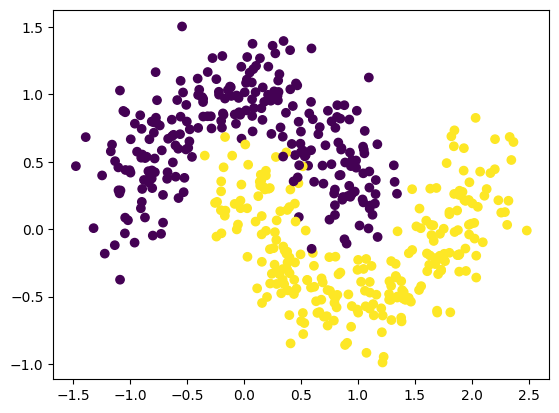

In [2]:
moons_points, moons_labels = make_moons(n_samples=500, noise=0.2, random_state=42)
plt.scatter(moons_points[:, 0], moons_points[:, 1], c=moons_labels)

## 1.1 Pure models.
First let's try to solve this case with good old Logistic Regression and simple (linear kernel) SVM classifier.

Train LR and SVM classifiers (choose params by hand, no CV or intensive grid search neeeded) and plot their decision regions. Calculate one preffered classification metric.

Describe results in one-two sentences.

_Tip:_ to plot classifiers decisions you colud use either sklearn examples ([this](https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_alpha.html#sphx-glr-auto-examples-neural-networks-plot-mlp-alpha-py) or any other) and mess with matplotlib yourself or great [mlxtend](https://github.com/rasbt/mlxtend) package (see their examples for details)

_Pro Tip:_ wirte function `plot_decisions` taking a dataset and an estimator and plotting the results cause you want to use it several times below

In [3]:
def plot_decisions(X, y, estimator, title):
    plt.figure(figsize=(8, 6))

    if hasattr(estimator, 'named_steps'):
        h = 0.02
        x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
        y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                             np.arange(y_min, y_max, h))

        Z = estimator.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
        plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.coolwarm)
    else:
        estimator.fit(X, y)
        plot_decision_regions(X, y, clf=estimator, legend=2)

    plt.title(title)
    plt.show()

    y_pred = estimator.predict(X)
    accuracy = accuracy_score(y, y_pred)
    print(f'{title} Accuracy: {accuracy:.3f}')
    return accuracy

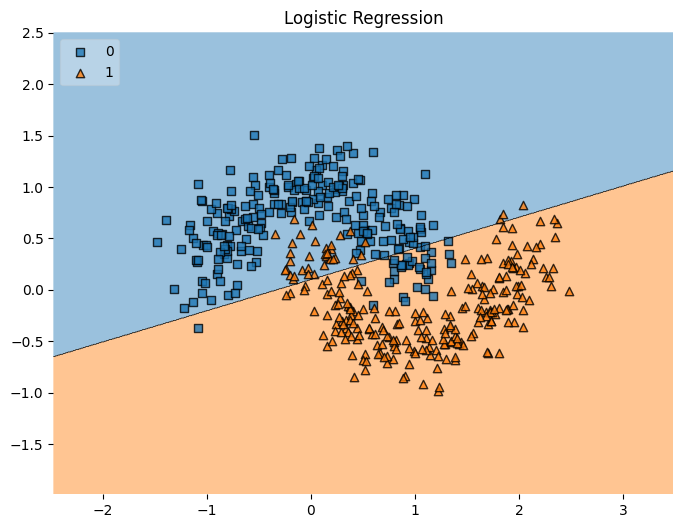

Logistic Regression Accuracy: 0.856


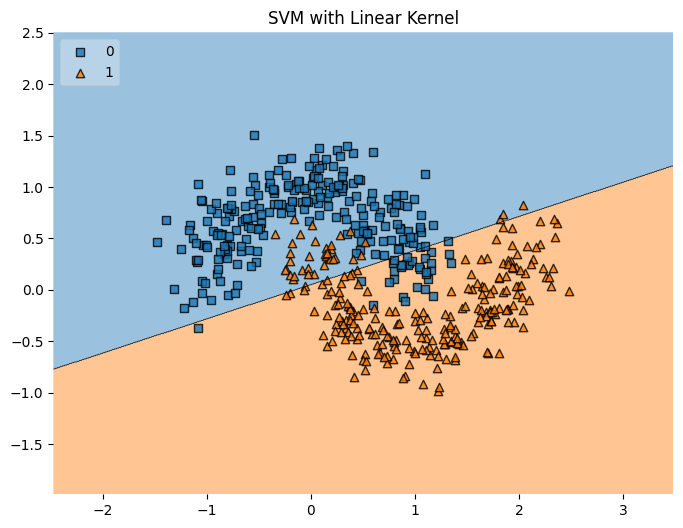

SVM with Linear Kernel Accuracy: 0.858


In [4]:
logreg = LogisticRegression(C = 1.0, random_state=42) # add some params
svm = SVC(kernel='linear', C = 1.0, random_state=42) # here too

### YOUR CODE HERE
logreg_acc = plot_decisions(moons_points, moons_labels, logreg, 'Logistic Regression')
svm_acc = plot_decisions(moons_points, moons_labels, svm, 'SVM with Linear Kernel')

## 1.2 Kernel trick

Now use different kernels (`poly`, `rbf`, `sigmoid`) on SVC to get better results. Play `degree` parameter and others.

For each kernel estimate optimal params, plot decision regions, calculate metric you've chosen eariler.

Write couple of sentences on:

* What have happenned with classification quality?
* How did decision border changed for each kernel?
* What `degree` have you chosen and why?

In [5]:
def optimize_and_plot_svm(X, y, kernel_type, param_grid):
    grid_search = GridSearchCV(SVC(random_state=42), param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X, y)

    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_

    title = f"SVM with {kernel_type} kernel"
    accuracy = plot_decisions(X, y, best_model, title)

    print(f"Best parameters: {best_params}")

    return best_model, accuracy, best_params

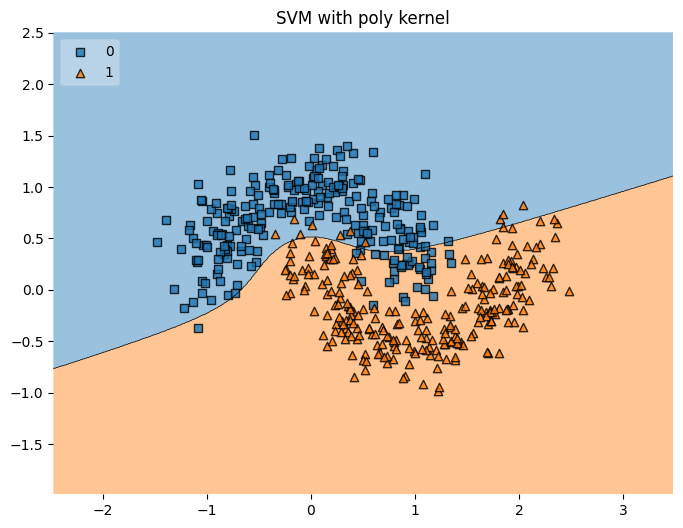

SVM with poly kernel Accuracy: 0.906
Best parameters: {'C': 1, 'degree': 3, 'gamma': 'scale', 'kernel': 'poly'}


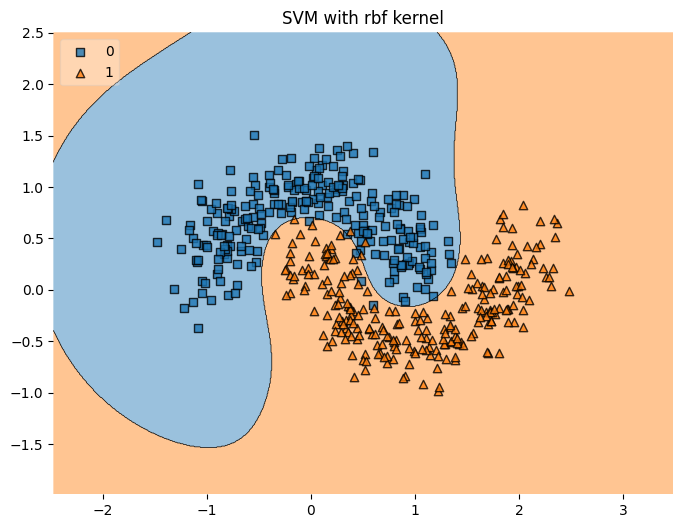

SVM with rbf kernel Accuracy: 0.984
Best parameters: {'C': 100, 'gamma': 1, 'kernel': 'rbf'}


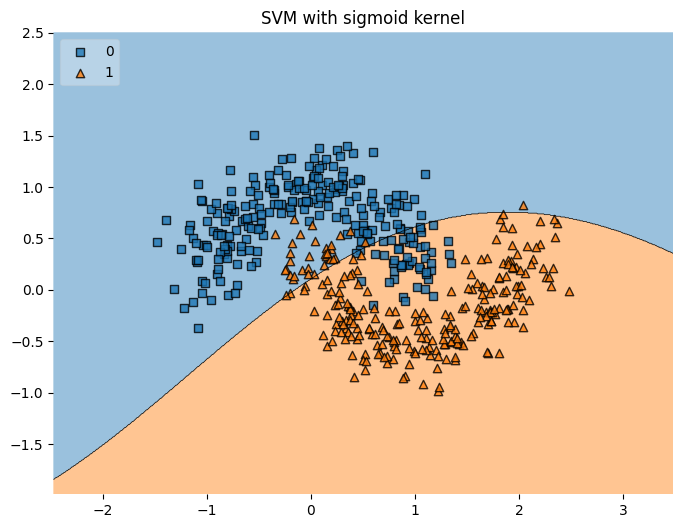

SVM with sigmoid kernel Accuracy: 0.826
Best parameters: {'C': 1, 'coef0': 0.5, 'gamma': 0.1, 'kernel': 'sigmoid'}


In [6]:
param_grids = {
    'poly': {
        'kernel': ['poly'],
        'degree': [2, 3, 4, 5],
        'C': [0.1, 1, 10],
        'gamma': ['scale', 'auto', 0.1, 1]
    },
    'rbf': {
        'kernel': ['rbf'],
        'C': [0.1, 1, 10, 100],
        'gamma': ['scale', 'auto', 0.1, 1, 10]
    },
    'sigmoid': {
        'kernel': ['sigmoid'],
        'C': [0.1, 1, 10, 100],
        'gamma': ['scale', 'auto', 0.1, 1],
        'coef0': [0, 0.5, 1, 2]
    }
}

results = {}
for kernel in ['poly', 'rbf', 'sigmoid']:
    model, accuracy, params = optimize_and_plot_svm(moons_points, moons_labels, kernel, param_grids[kernel])
    results[kernel] = {'model': model, 'accuracy': accuracy, 'params': params}

**Изменения**
1. Качество (accuracy) выросло с 0.858 до 0.984 для rbf
2. Разделяющая гиперплоскость перестала быть линейной, что позволило лучше разделить датасет с полумесяцами.
3. Хуже всего ядро sigmoid из-за плавных S-образных сигмоидальных границ.
4. Лучше всего показывает себя rbf (radial basis function), т.к. учитывает расстояние между точками в пространстве и так определяет их схожесть.
5. Лучшая степень degree для poly ядра = 3. Кубический полином.

## 1.3 Simpler solution (of a kind)
What is we could use Logisitc Regression to successfully solve this task?

Feature generation is a thing to help here. Different techniques of feature generation are used in real life, couple of them will be covered in additional lectures.

In particular case simple `PolynomialFeatures` ([link](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)) are able to save the day.

Generate the set of new features, train LR on it, plot decision regions, calculate metric.

* Compare SVM's results with this solution (quality, borders type)
* What degree of PolynomialFeatures have you used? Compare with same SVM kernel parameter.

In [7]:
def test_polynomial_logistic(X, y, degrees):
    results = {}

    for degree in degrees:
        poly_lr = Pipeline([
            ('poly', PolynomialFeatures(degree=degree)),
            ('lr', LogisticRegression(C=1.0, random_state=42, max_iter=1000))
        ])

        poly_lr.fit(X, y)

        accuracy = plot_decisions(X, y, poly_lr, f'Logistic regression with polynomial features')

        results[degree] = {
            'model': poly_lr,
            'accuracy': accuracy,
            'num_features': PolynomialFeatures(degree=degree).fit_transform(X).shape[1]
        }

        print(f"Degree {degree}: accuracy = {accuracy:.3f}, features = {results[degree]['num_features']}")

    return results

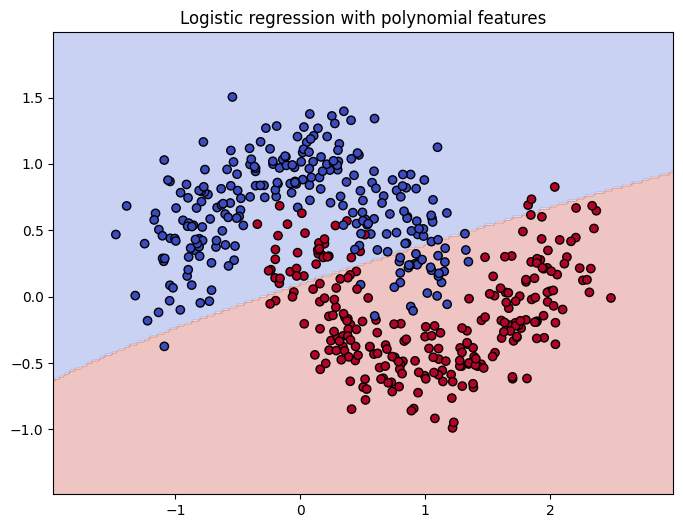

Logistic regression with polynomial features Accuracy: 0.860
Degree 2: accuracy = 0.860, features = 6


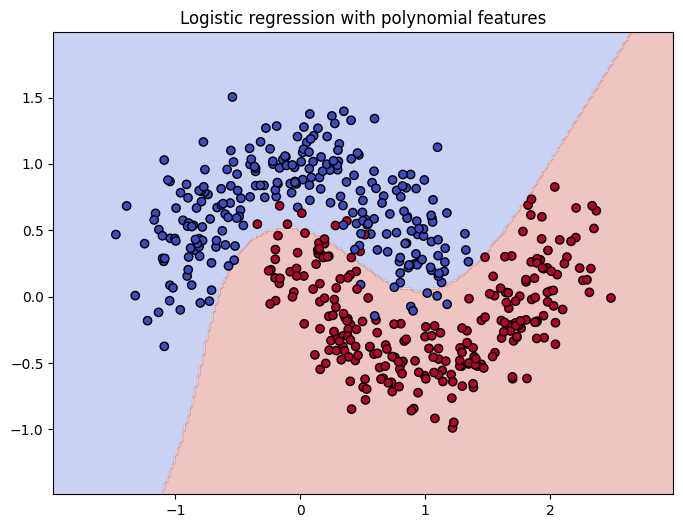

Logistic regression with polynomial features Accuracy: 0.968
Degree 3: accuracy = 0.968, features = 10


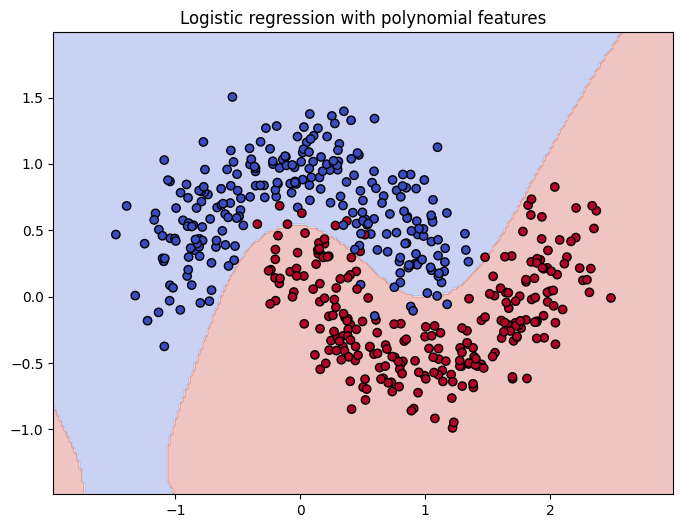

Logistic regression with polynomial features Accuracy: 0.970
Degree 4: accuracy = 0.970, features = 15


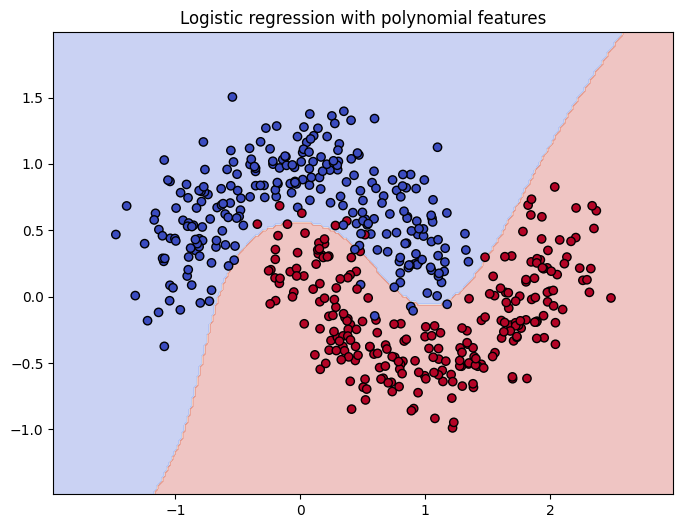

Logistic regression with polynomial features Accuracy: 0.972
Degree 5: accuracy = 0.972, features = 21


In [8]:
degrees = [2, 3, 4, 5]
lr_poly_results = test_polynomial_logistic(moons_points, moons_labels, degrees)

**Вывод** лучшая степень полинома = 5, accuracy = 0.972, но svm c rbf ядром и accuracy 0.984 превзойти не удалось

In [11]:
# Сравнение с SVM с разными типами ядер
print(f"SVM Poly (degree=3): Accuracy = {results['poly']['accuracy']:.3f}")
print(f"LR + PolyFeatures (degree=5): Accuracy = {lr_poly_results[5]['accuracy']:.3f}")
print(f"SVM RBF: Accuracy = {results['rbf']['accuracy']:.3f}")

SVM Poly (degree=3): Accuracy = 0.906
LR + PolyFeatures (degree=5): Accuracy = 0.972
SVM RBF: Accuracy = 0.984


## 1.4 Harder problem

Let's make this task a bit more challenging via upgrading dataset:

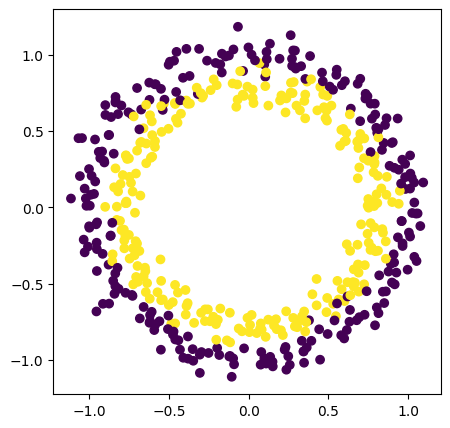

In [13]:
circles_points, circles_labels = make_circles(n_samples=500, noise=0.06, random_state=42)

plt.figure(figsize=(5, 5))
plt.scatter(circles_points[:, 0], circles_points[:, 1], c=circles_labels)

And even more:

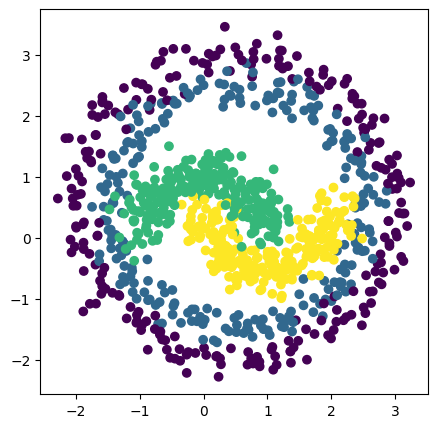

In [14]:
points = np.vstack((circles_points*2.5 + 0.5, moons_points))
labels = np.hstack((circles_labels, moons_labels + 2)) # + 2 to distinct moons classes

plt.figure(figsize=(5, 5))
plt.scatter(points[:, 0], points[:, 1], c=labels)

Now do your best using all the approaches above!

Tune LR with generated features, SVM with appropriate kernel of your choice. You may add some of your loved models to demonstrate their (and your) strength. Again plot decision regions, calculate metric.

Justify the results in a few phrases.

In [18]:
def optimize_svm_rbf(X, y):
    param_grid = {
        'svm__C': [0.1, 1, 10, 100],
        'svm__gamma': [0.01, 0.1, 1, 10, 100],
        'svm__kernel': ['rbf']
    }

    svm_pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('svm', SVC(random_state=42))
    ])

    grid_search = GridSearchCV(
        svm_pipeline,
        param_grid,
        cv=5,
        scoring='accuracy',
        n_jobs=-1,
        verbose=1
    )

    grid_search.fit(X, y)

    print(f"Best parameters: {grid_search.best_params_}")
    print(f"Best cross-validation score: {grid_search.best_score_:.4f}")

    return grid_search.best_estimator_

In [16]:
def optimize_logistic_poly(X, y):
    param_dist = {
        'poly__degree': randint(1, 6),
        'lr__C': uniform(0.1, 100),
        'lr__penalty': ['l2', 'none'],
        'lr__solver': ['lbfgs', 'newton-cg']
    }

    poly_lr_pipeline = Pipeline([
        ('poly', PolynomialFeatures()),
        ('scaler', StandardScaler()),
        ('lr', LogisticRegression(random_state=42, max_iter=1000))
    ])

    random_search = RandomizedSearchCV(
        poly_lr_pipeline,
        param_dist,
        n_iter=20,
        cv=5,
        scoring='accuracy',
        random_state=42,
        n_jobs=-1,
        verbose=1
    )
    random_search.fit(X, y)

    print(f"Best parameters: {random_search.best_params_}")
    print(f"Best cross-validation score: {random_search.best_score_:.4f}")

    return random_search.best_estimator_

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters: {'svm__C': 10, 'svm__gamma': 1, 'svm__kernel': 'rbf'}
Best cross-validation score: 0.9340


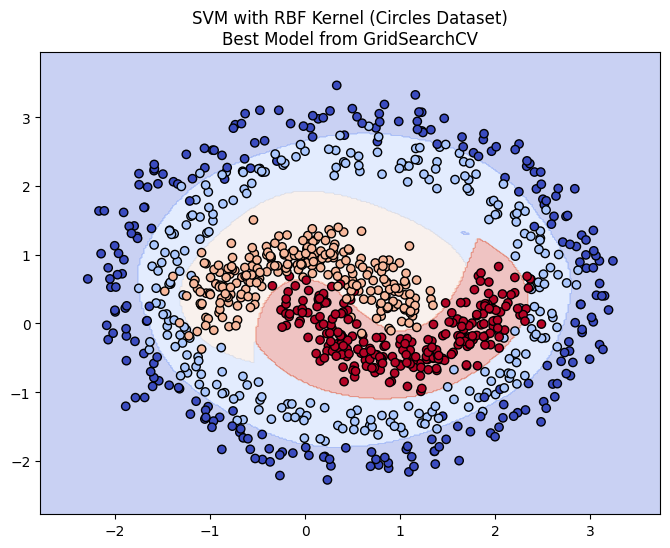

SVM with RBF Kernel (Circles Dataset)
Best Model from GridSearchCV Accuracy: 0.943
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters: {'lr__C': np.float64(18.282496720710064), 'lr__penalty': 'l2', 'lr__solver': 'lbfgs', 'poly__degree': 4}
Best cross-validation score: 0.9300


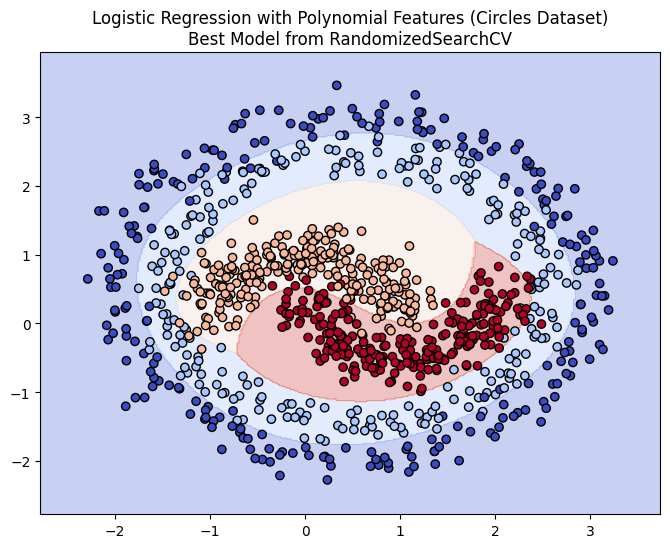

Logistic Regression with Polynomial Features (Circles Dataset)
Best Model from RandomizedSearchCV Accuracy: 0.942


In [24]:
best_svm_circles = optimize_svm_rbf(points, labels)
svm_circles_acc = plot_decisions(points, labels, best_svm_circles,
                                'SVM with RBF Kernel (Circles Dataset)\nBest Model from GridSearchCV')

best_lr_circles = optimize_logistic_poly(points, labels)
lr_circles_acc = plot_decisions(points, labels, best_lr_circles,
                               'Logistic Regression with Polynomial Features (Circles Dataset)\nBest Model from RandomizedSearchCV')

In [25]:
results = {
    'Circles Dataset': {
        'SVM RBF (GridSearch)': svm_circles_acc,
        'LR Poly (RandomSearch)': lr_circles_acc,
    }
}

for dataset, models in results.items():
    print(f"\n{dataset}:")
    for model_name, accuracy in models.items():
        print(f"  {model_name}: {accuracy:.4f}")


Circles Dataset:
  SVM RBF (GridSearch): 0.9430
  LR Poly (RandomSearch): 0.9420


**Вывод** даже с таким сложным круговым распределением удалось с высоким accuracy классифицировать точки. Лучший результат получился с SVM и ядром RBF, при подборе гиперпараметров и кросс-валидации с помощью gridsearch, accuracy = 0.943